# Comp4331 Assignment 1

## Preparing the dataset

In [1]:
# !echo ">> 1. remove old data if exists."
# ![ -e "student-por.csv" ] && rm "student-por.csv"
# !echo ">> 2. download data from UCI."
# !wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
# !echo ">> 3. unzip the data."
# !unzip student.zip
# !echo ">> 4. remove unnecessary files."
# !rm "student.zip" "student-mat.csv" "student-merge.R" "student.txt"
# !echo ">> 5. finished!"

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%config InteractiveShell.ast_node_interactivity = 'all'


In [21]:
data_file = r"C:\Users\kkaus\OneDrive - HKUST Connect\Courses\Year 3\COMP 4331\Coding Folder\Assignments\Assignment 1\data\student-por.csv"
data_df = pd.read_csv(data_file, sep=';')
data_df.head(10)
data_df.shape



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


(649, 33)

## Task 1. Basic summary

In [25]:
# Age attribute
print("Task 1")
print()
print("Age mean, standard deviation, mode, median, and the five-number summary:")
age_mean = data_df['age'].mean()
age_median = data_df['age'].median()
age_mode = data_df['age'].mode()
std_age = data_df['age'].std()


print("Age mean:", age_mean)
print("The standard deviation of age is: ", std_age)
print("Age median:", age_median)
print("Age mode:", age_mode)


print("5 Number Summary:")
data_df['age'].describe().iloc[3:8]
print("____________________________________________")


print("G1 mean, standard deviation, mode, median, and the five-number summary:")
G1_mean = data_df['G1'].mean()
G1_median = data_df['G1'].median()
G1_mode = data_df['G1'].mode()
G1_std = data_df['G1'].std()

print("G1 mean:", G1_mean)
print("The standard deviation of G1 is: ", G1_std)
print("G1 median:", G1_median)
print("G1 mode:", G1_mode)\

data_df['G1'].describe().iloc[3:8]





Task 1

Age mean, standard deviation, mode, median, and the five-number summary:
Age mean: 16.7442218798151
The standard deviation of age is:  1.2181376394800618
Age median: 17.0
Age mode: 0    17
dtype: int64
5 Number Summary:


min    15.0
25%    16.0
50%    17.0
75%    18.0
max    22.0
Name: age, dtype: float64

____________________________________________
G1 mean, standard deviation, mode, median, and the five-number summary:
G1 mean: 11.399075500770415
The standard deviation of G1 is:  2.745265128446369
G1 median: 11.0
G1 mode: 0    10
dtype: int64


min     0.0
25%    10.0
50%    11.0
75%    13.0
max    19.0
Name: G1, dtype: float64

## Task 2. Box plot

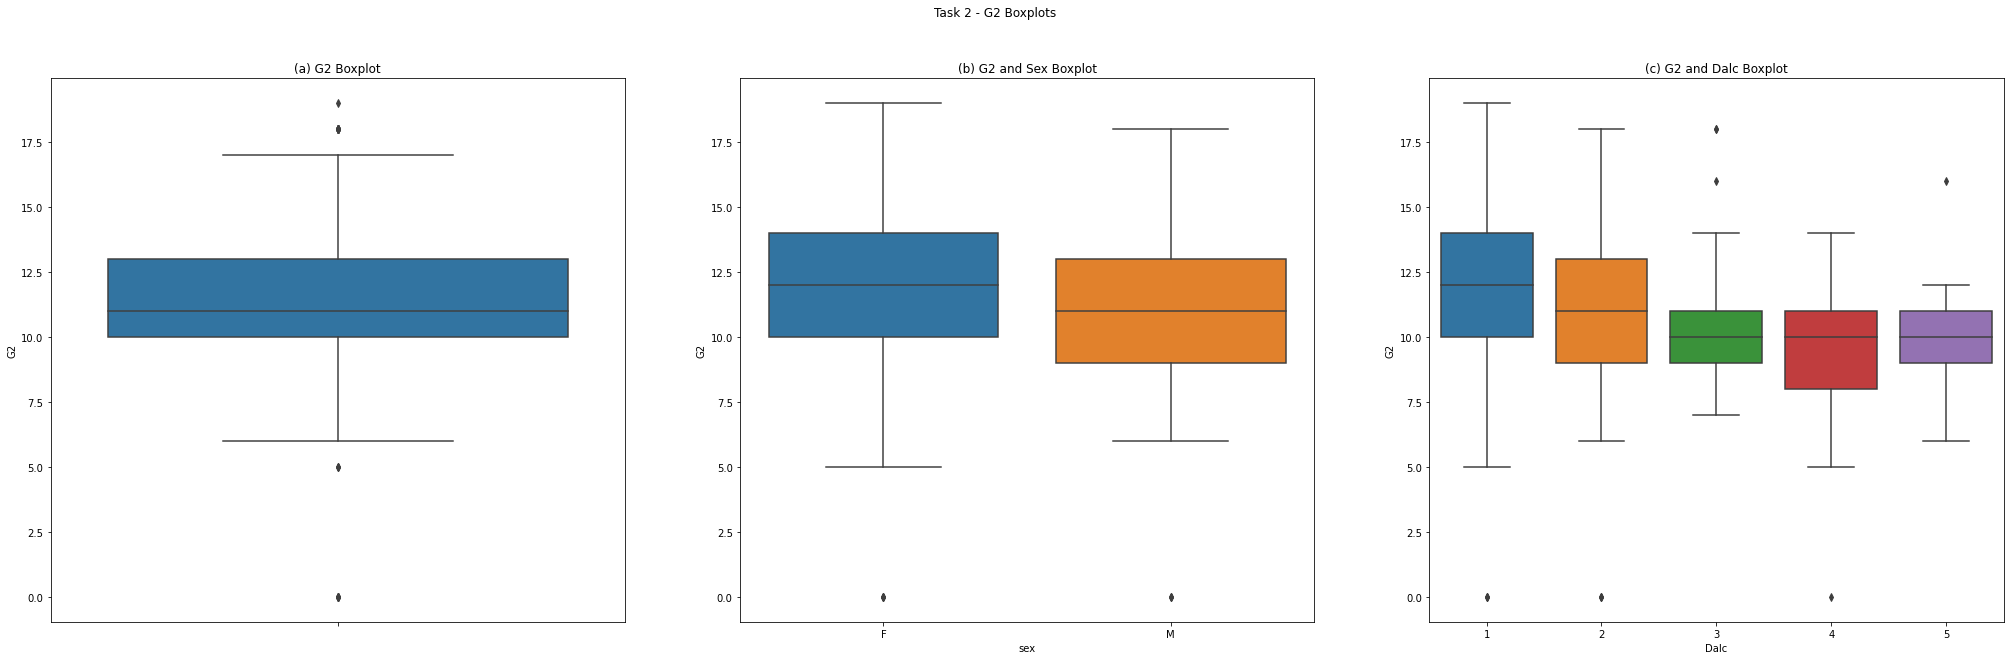

In [8]:
fig, axis = plt.subplots(1,3, figsize=(35, 10))
fig.suptitle('Task 2 - G2 Boxplots')


sns.boxplot(ax=axis[0], data=data_df, y="G2").set_title("(a) G2 Boxplot");
sns.boxplot(ax=axis[1], data=data_df, y="G2", x='sex').set_title("(b) G2 and Sex Boxplot");
sns.boxplot(ax=axis[2], data=data_df, y="G2", x='Dalc').set_title("(c) G2 and Dalc Boxplot");




## Task 3. Hist plot

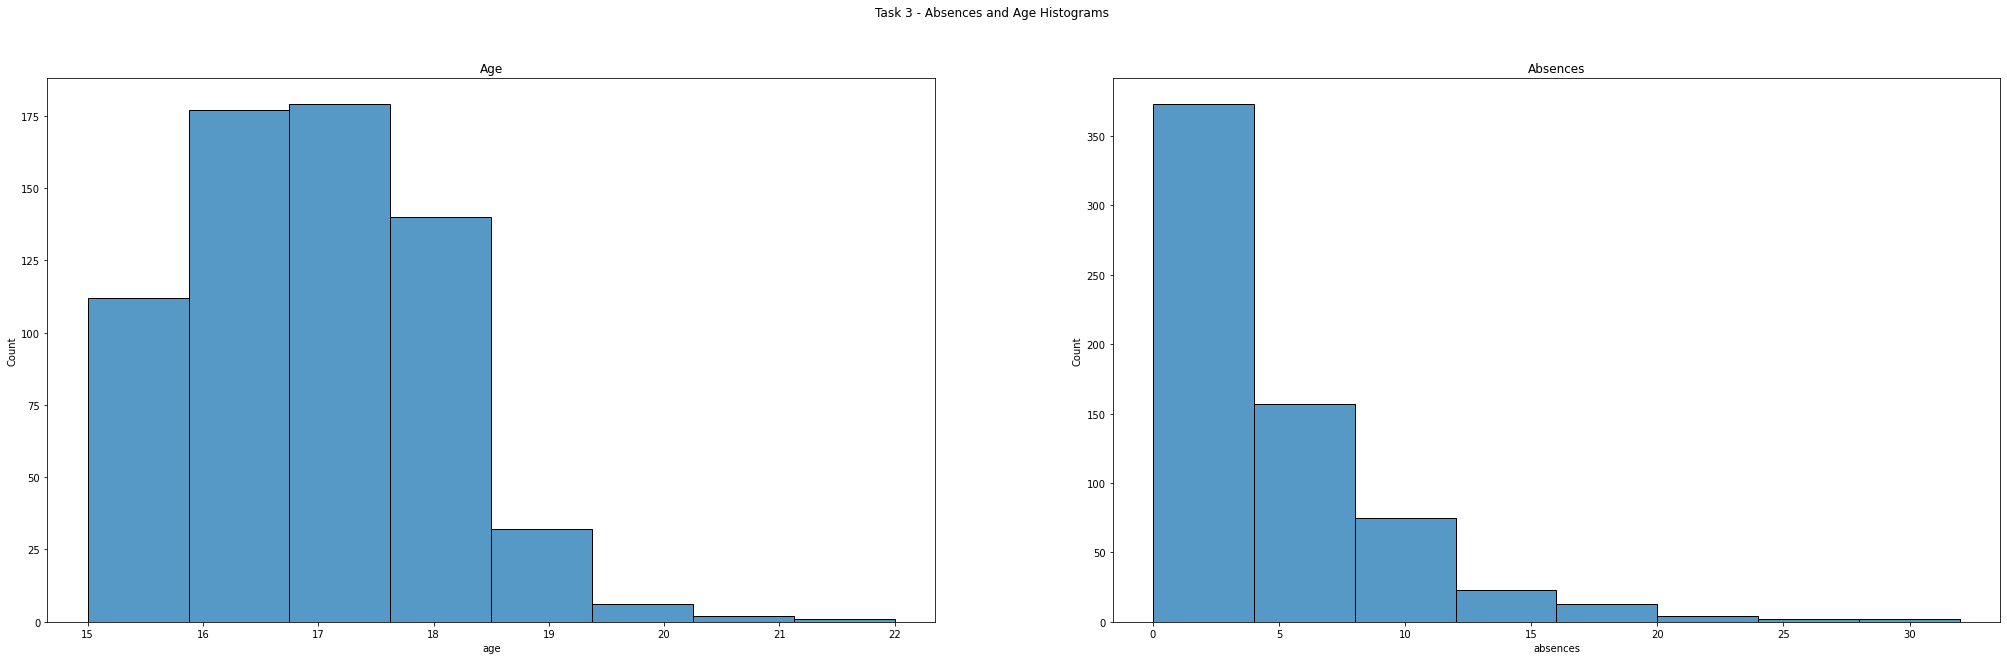

In [9]:
fig, axis = plt.subplots(1,2, figsize=(35, 10))
fig.suptitle('Task 3 - Absences and Age Histograms')

sns.histplot(ax=axis[0], data=data_df, x="age", bins=8).set_title("Age");
sns.histplot(ax=axis[1], data=data_df, x="absences", bins=8).set_title("Absences");

# Task 4. Scatter plot

The correllation between G2 and G3: 0.9185480035603523


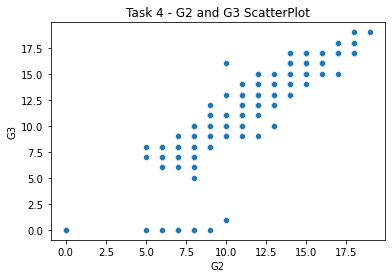

In [27]:
sns.scatterplot(data=data_df, x="G2", y="G3").set_title("Task 4 - G2 and G3 ScatterPlot");
corr_g2g3 = data_df[["G2","G3"]].corr(method="pearson").iloc[1,0]
print("The correllation between G2 and G3: {}".format(corr_g2g3));

## Task 5. Correlation

In [12]:
print("Task 5 - Top 5 Attributes that are most correlated with G1")

corr = data_df[["studytime", "traveltime", "age", "absences", "health", "Walc", "Dalc", "famrel", "goout", "G2", "G1"]].corr(method="pearson").iloc[10]

corr1 = corr.abs()
print("Top 5 Attributes that are most correlated with G1")
corr.sort_values(ascending=False, key=pd.Series.abs).iloc[1:6]

Task 5 - Top 5 Attributes that are most correlated with G1
Top 5 Attributes that are most correlated with G1


G2           0.864982
studytime    0.260875
Dalc        -0.195171
age         -0.174322
Walc        -0.155649
Name: G1, dtype: float64

# Task 6. $\chi^2$-test



In [13]:
print("Task 6\n(a)Attributes internet and romantic independence at significance level 0.01")
int_rom_crosstab = pd.crosstab(data_df["internet"], data_df["romantic"])
int_rom_crosstab

int_rom_chi2, int_rom_p, int_rom_dof, _ = stats.chi2_contingency((int_rom_crosstab))
print("Chi^2:{:.5f}\nP:{:.5f}\nDoF:{}".format(int_rom_chi2,int_rom_p,int_rom_dof))
print()
print("The Chi^2 value is 0.625769 which is smaller than 6.64 (value at signifiance level 0.01 with degree of freedom 1)")
print("This means we accept the hypothesis that internet and romantic are independent")
print()
print("____________________________________________")
print("(b) are the attributes sex and romantic independent of each other at significance level 0.01")
sex_rom_crosstab = pd.crosstab(data_df["sex"],data_df["romantic"])
sex_rom_crosstab

sex_rom_chi2, sex_rom_p, sex_rom_dof, _ = stats.chi2_contingency((sex_rom_crosstab))
print("Chi^2:{:.5f}\nP:{:.5f}\nDoF:{}".format(sex_rom_chi2,sex_rom_p,sex_rom_dof))
print()

print("The Chi^2 value is 7.415931 which is highe than 6.64 (value at significance level 0.01 and degree of freedom 0.01)\nThis means we can reject the hypothesis, as a result we can state that the attributes 'sex' and 'romantic' is not independent. ")

Task 6
(a)Attributes internet and romantic independence at significance level 0.01


romantic,no,yes
internet,,
no,100,51
yes,310,188


Chi^2:0.62577
P:0.42891
DoF:1

The Chi^2 value is 0.625769 which is smaller than 6.64 (value at signifiance level 0.01 with degree of freedom 1)
This means we accept the hypothesis that internet and romantic are independent

____________________________________________
(b) are the attributes sex and romantic independent of each other at significance level 0.01


romantic,no,yes
sex,,
F,225,158
M,185,81


Chi^2:7.41593
P:0.00646
DoF:1

The Chi^2 value is 7.415931 which is highe than 6.64 (value at significance level 0.01 and degree of freedom 0.01)
This means we can reject the hypothesis, as a result we can state that the attributes 'sex' and 'romantic' is not independent. 


## Task 7. Normalization

In [14]:
print("Task 7 - Normalization\n(a) MinMax Normalization of studytime")
scaler = MinMaxScaler(feature_range=(0,1))

data_df["studytime_minmax_scaled"] = scaler.fit_transform(data_df[["studytime"]])
print("___________________________________________")
print("(b)Z-score normalization of G1,G2,G3,Dalc,Walc")
z_scaler = StandardScaler()

data_df["G1_z_scaled"] = z_scaler.fit_transform(data_df[['G1']])
data_df["G2_z_scaled"] = z_scaler.fit_transform(data_df[['G2']])
data_df["G3_z_scaled"] = z_scaler.fit_transform(data_df[['G3']])
data_df["Dalc_z_scaled"] = z_scaler.fit_transform(data_df[['Dalc']])
data_df["Walc_z_scaled"] = z_scaler.fit_transform(data_df[['Walc']])
data_df.head()

print("___________________________________________")

print("(c)Output to file")
data_df[['studytime_minmax_scaled','G1_z_scaled','G2_z_scaled','G3_z_scaled','Dalc_z_scaled','Walc_z_scaled']].to_csv('data normalized.csv')



Task 7 - Normalization
(a) MinMax Normalization of studytime
___________________________________________
(b)Z-score normalization of G1,G2,G3,Dalc,Walc


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G1,G2,G3,studytime_minmax_scaled,G1_z_scaled,G2_z_scaled,G3_z_scaled,Dalc_z_scaled,Walc_z_scaled
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,0,11,11,0.333333,-4.155470,-0.195820,-0.280658,-0.543555,-0.997695
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,2,9,11,11,0.333333,-0.874570,-0.195820,-0.280658,-0.543555,-0.997695
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,6,12,13,12,0.333333,0.219064,0.491137,0.029116,0.538553,0.560678
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,14,14,14,0.666667,0.948153,0.834615,0.648663,-0.543555,-0.997695
4,GP,F,16,U,GT3,T,3,3,other,other,...,0,11,13,13,0.333333,-0.145481,0.491137,0.338889,-0.543555,-0.218508


___________________________________________
(c)Output to file


## Task 8. PCA

Task 8 - PCA
(a) Cumulative explained variance
eigenvalues [2.89943685 1.46517552 0.38371112 0.18308006 0.0763125 ]
explain_ratio [0.57899386 0.29258359 0.07662398 0.03655959 0.01523898]
accumulated explain_ratio  [0.58 0.87 0.95 0.98 1.  ]


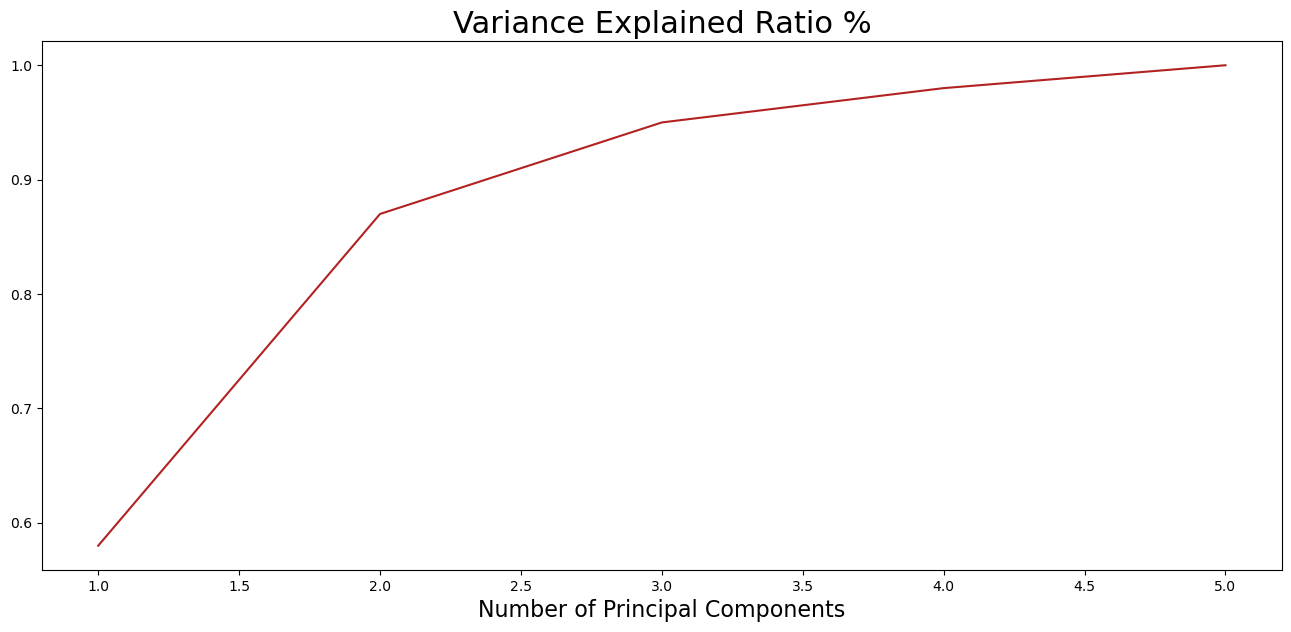

In [15]:
print("Task 8 - PCA\n(a) Cumulative explained variance")


# seperating normalized data into array

atr = ["G1_z_scaled","G2_z_scaled","G3_z_scaled","Dalc_z_scaled","Walc_z_scaled"]
x = data_df.loc[:,atr].values

pca = PCA(n_components=5)
principalcomponents = pca.fit_transform(x)

eigenvalue = pca.explained_variance_
print('eigenvalues',eigenvalue)
print('explain_ratio',pca.explained_variance_ratio_)

explain_ratio = pca.explained_variance_ratio_.cumsum().round(2)
print('accumulated explain_ratio ',explain_ratio)

fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100);
plt.plot(range(1, 6), explain_ratio, color='firebrick');
plt.title('Variance Explained Ratio %', fontsize=22);
plt.xlabel('Number of Principal Components', fontsize=16);






In [16]:
print("___________________________________________")

print("(b) and (c) transforming to 3 components and storing in csv")
pca_3 = PCA(n_components=3)  # 3 components is atleast 0.9 variance explained
principalcomponents_3 = pca_3.fit_transform(x) 

np.savetxt("data reduced.csv", principalcomponents_3, delimiter=",")  #save to csv

pca_df = pd.DataFrame(principalcomponents_3, columns=['d1','d2','d3'])

pca_df



___________________________________________
(b) and (c) transforming to 3 components and storing in csv


,d1,d2,d3
0,2.131286,-1.904478,0.395291
1,0.377079,-1.287285,0.321735
2,-0.150234,0.878536,-0.001121
3,-1.676912,-0.571828,0.331192
4,-0.559548,-0.374990,-0.208094
...,...,...,...
644,0.524778,-0.747861,-0.240501
645,-2.401428,-0.323148,0.346825
646,0.136823,-1.193677,0.301065
647,1.583662,1.665583,0.194115


# D1, D2, D3 - 5 figure statistic


In [17]:
print("D1: 5 Number Summary:")
pca_df['d1'].describe().iloc[3:8]
print("___________________________________________")
print("D2: 5 Number Summary:")
pca_df['d2'].describe().iloc[3:8]
print("___________________________________________")
print("D3: 5 Number Summary:")
pca_df['d3'].describe().iloc[3:8]



D1: 5 Number Summary:


min   -4.255613
25%   -1.122190
50%   -0.012745
75%    1.171323
max    6.200937
Name: d1, dtype: float64

___________________________________________
D2: 5 Number Summary:


min   -2.927694
25%   -0.888787
50%   -0.237836
75%    0.726003
max    4.777154
Name: d2, dtype: float64

___________________________________________
D3: 5 Number Summary:


min   -1.908536
25%   -0.259555
50%    0.213586
75%    0.331192
max    3.374054
Name: d3, dtype: float64

## Task 9. Missing values

In [18]:
print("Task 9 -Replacing missing values")

#reloading the dataset

reload_data_df = pd.read_csv(data_file, sep=';')
reload_data_df['G2'].describe().iloc[3:4] # seeing the min

G2_mode = reload_data_df['G2'].mode()
G3_mode = reload_data_df['G3'].mode()

reload_data_df["G2"].replace(to_replace = 0, value= G2_mode[0], inplace=True)
reload_data_df["G3"].replace(to_replace = 0, value= G3_mode[0], inplace=True)

print("0's replaced with mode")
reload_data_df['G2'].describe().iloc[3:4] # seeing the min
print("___________________________________________")


# 

Task 9 -Replacing missing values


min    0.0
Name: G2, dtype: float64

0's replaced with mode


min    5.0
Name: G2, dtype: float64

___________________________________________


Old vs New Correlations
The old correllation between G2 and G3: 0.9185480035603523
The new correllation between G2 and G3: 0.9234438821040236
___________________________________________


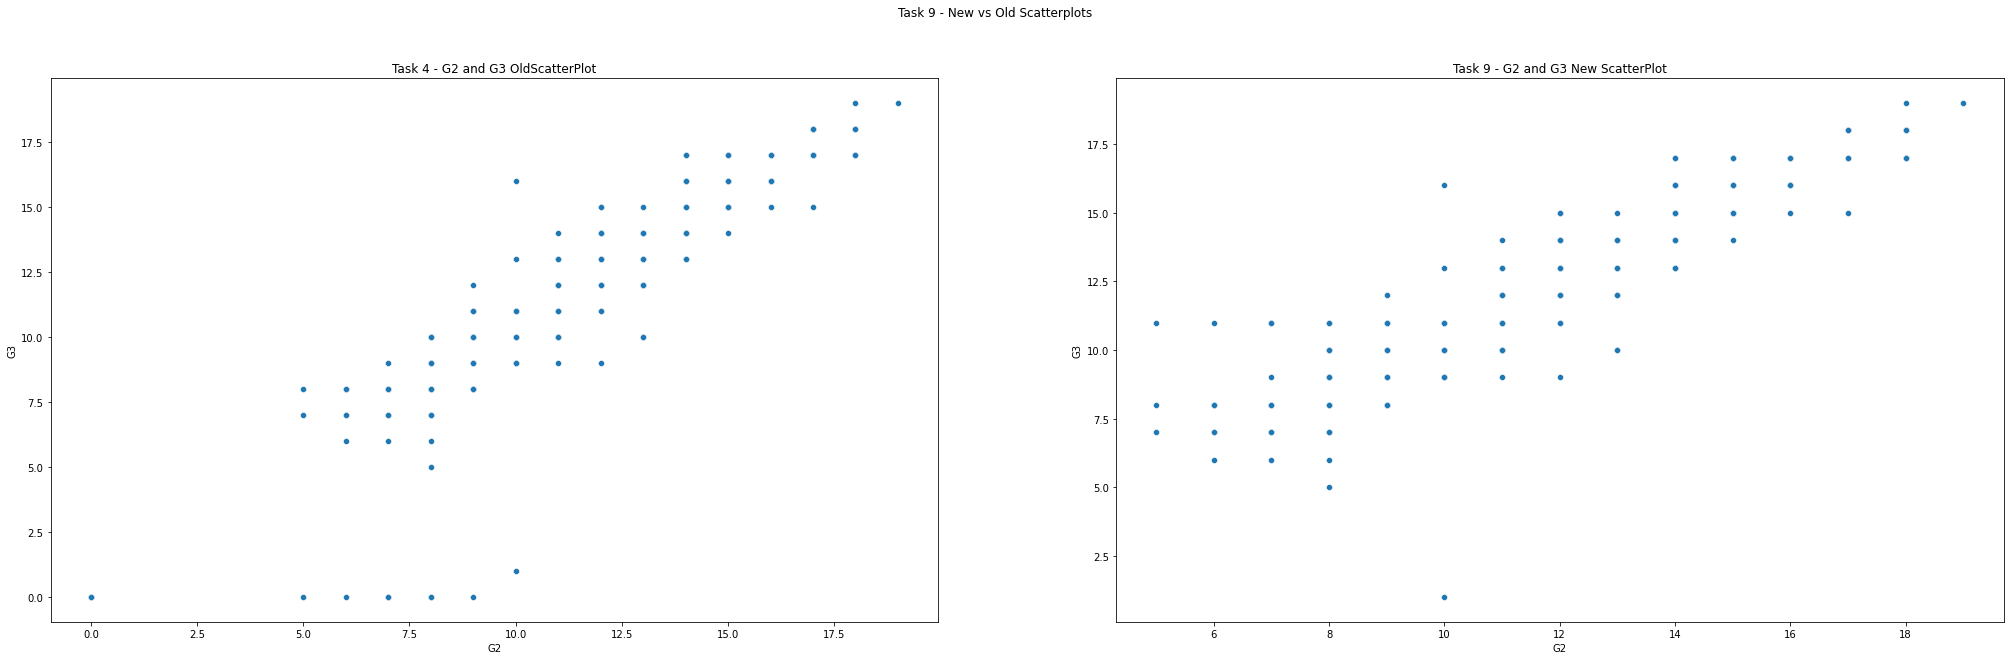

In [19]:
print("Old vs New Correlations")

reload_data_df[["G2", "G3"]].corr(method='pearson')
new_corr_g2g3 = reload_data_df[["G2","G3"]].corr(method="pearson").iloc[1,0]
print("The old correllation between G2 and G3: {}".format(corr_g2g3))
print("The new correllation between G2 and G3: {}".format(new_corr_g2g3))
print("___________________________________________")

fig, axis = plt.subplots(1,2, figsize=(35, 10))
fig.suptitle('Task 9 - New vs Old Scatterplots')

sns.scatterplot(ax = axis[0], data=data_df, x="G2", y="G3").set_title("Task 4 - G2 and G3 OldScatterPlot");
sns.scatterplot(ax = axis[1], data=reload_data_df, x="G2", y="G3").set_title("Task 9 - G2 and G3 New ScatterPlot");




